In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
upload_files = files.upload()

Saving insurance_claims.csv to insurance_claims.csv


In [ ]:
df=pd.read_csv("insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


# **Data Cleaning**

In [ ]:
# checking null values
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [ ]:
# dropping unwanted features
drop_cols = ['policy_number', 'policy_bind_date', 'incident_date','incident_location', 'incident_hour_of_the_day','auto_make', 'auto_model', 'auto_year']

df.drop(columns=drop_cols, inplace=True)

In [ ]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,_c39
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,YES,1,2,YES,71610,6510,13020,52080,Y,NaN
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,?,0,0,?,5070,780,780,3510,Y,NaN
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,NO,2,3,NO,34650,7700,3850,23100,N,NaN
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,?,1,2,NO,63400,6340,6340,50720,Y,NaN
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,NO,0,1,NO,6500,1300,650,4550,N,NaN


In [ ]:
col_drop=['policy_state','policy_csl','insured_zip','insured_education_level','_c39']
df.drop(columns=col_drop,inplace=True)

In [ ]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1000,1406.91,0,MALE,craft-repair,sleeping,husband,53300,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,2000,1197.22,5000000,MALE,machine-op-inspct,reading,other-relative,0,...,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,2000,1413.14,5000000,FEMALE,sales,board-games,own-child,35100,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,2000,1415.74,6000000,FEMALE,armed-forces,board-games,unmarried,48900,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,1000,1583.91,6000000,MALE,sales,board-games,unmarried,66000,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [ ]:
col_drop1 = ['insured_occupation','insured_hobbies','insured_relationship']
df.drop(columns=col_drop1,inplace=True)

In [ ]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,incident_type,collision_type,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1000,1406.91,0,MALE,53300,0,Single Vehicle Collision,Side Collision,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,2000,1197.22,5000000,MALE,0,0,Vehicle Theft,?,...,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,2000,1413.14,5000000,FEMALE,35100,0,Multi-vehicle Collision,Rear Collision,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,2000,1415.74,6000000,FEMALE,48900,-62400,Single Vehicle Collision,Front Collision,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,1000,1583.91,6000000,MALE,66000,-46000,Vehicle Theft,?,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [ ]:
col_drop2 = ['incident_city','incident_state']
df.drop(columns=col_drop2,inplace=True)

In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [ ]:
col_drop3 = ['property_damage']
df.drop(columns=col_drop3,inplace=True)

In [ ]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,incident_type,collision_type,...,authorities_contacted,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1000,1406.91,0,MALE,53300,0,Single Vehicle Collision,Side Collision,...,Police,1,1,2,YES,71610,6510,13020,52080,Y
1,228,42,2000,1197.22,5000000,MALE,0,0,Vehicle Theft,?,...,Police,1,0,0,?,5070,780,780,3510,Y
2,134,29,2000,1413.14,5000000,FEMALE,35100,0,Multi-vehicle Collision,Rear Collision,...,Police,3,2,3,NO,34650,7700,3850,23100,N
3,256,41,2000,1415.74,6000000,FEMALE,48900,-62400,Single Vehicle Collision,Front Collision,...,Police,1,1,2,NO,63400,6340,6340,50720,Y
4,228,44,1000,1583.91,6000000,MALE,66000,-46000,Vehicle Theft,?,...,NaN,1,0,1,NO,6500,1300,650,4550,N


In [ ]:
# checking value counts for all columns
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(df[col].value_counts())

insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64
incident_type
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: count, dtype: int64
collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64
incident_severity
Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: count, dtype: int64
authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64
police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64
fraud_reported
N    753
Y    247
Name: count, dtype: int64


In [ ]:
df['authorities_contacted']

,authorities_contacted
0,Police
1,Police
2,Police
3,Police
4,NaN
...,...
995,Fire
996,Fire
997,Police
998,Other


In [ ]:
# replacing missing values
df['collision_type'] = df['collision_type'].replace('?', '')

In [ ]:
# replacing missing values
df['police_report_available'] = (df['police_report_available'].replace('?', ''))

In [ ]:
# filling missing values
# Numerical → median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical → mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,incident_type,collision_type,...,authorities_contacted,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1000,1406.91,0,MALE,53300,0,Single Vehicle Collision,Side Collision,...,Police,1,1,2,YES,71610,6510,13020,52080,Y
1,228,42,2000,1197.22,5000000,MALE,0,0,Vehicle Theft,,...,Police,1,0,0,,5070,780,780,3510,Y
2,134,29,2000,1413.14,5000000,FEMALE,35100,0,Multi-vehicle Collision,Rear Collision,...,Police,3,2,3,NO,34650,7700,3850,23100,N
3,256,41,2000,1415.74,6000000,FEMALE,48900,-62400,Single Vehicle Collision,Front Collision,...,Police,1,1,2,NO,63400,6340,6340,50720,Y
4,228,44,1000,1583.91,6000000,MALE,66000,-46000,Vehicle Theft,,...,Police,1,0,1,NO,6500,1300,650,4550,N


# **Outlier Detection**

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR)))

outliers.sum().sort_values(ascending=False)

,0
umbrella_limit,202
policy_annual_premium,9
property_claim,6
age,4
total_claim_amount,1
months_as_customer,0
capital-gains,0
policy_deductable,0
capital-loss,0
number_of_vehicles_involved,0


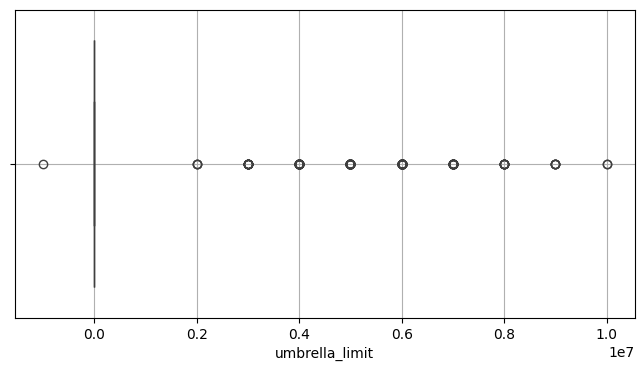

In [ ]:
# for umbrella_limit
plt.figure(figsize=(8,4))
sns.boxplot(x=df['umbrella_limit'])
plt.grid()
plt.show()

In [ ]:
df['umbrella_limit'].value_counts().sort_index()

,count
umbrella_limit,
-1000000,1
0,798
2000000,3
3000000,12
4000000,39
5000000,46
6000000,57
7000000,29
8000000,8


In [ ]:
# values above 6M are very rare and unrealistic
idx = df[df['umbrella_limit'] > 6000000].index
df.drop(idx, inplace=True)

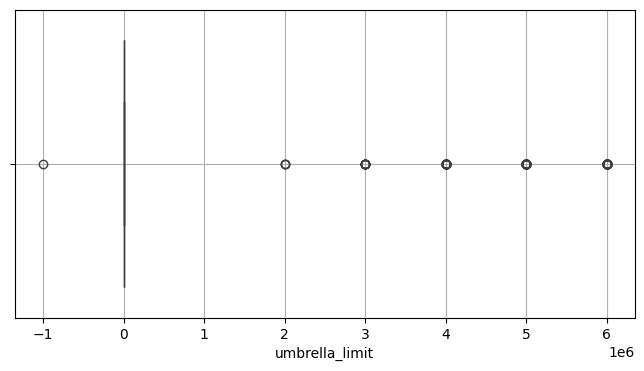

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['umbrella_limit'])
plt.grid()
plt.show()

In [ ]:
print("Removed rows:", len(idx))
print("Remaining rows:", df.shape[0])

Removed rows: 44
Remaining rows: 956


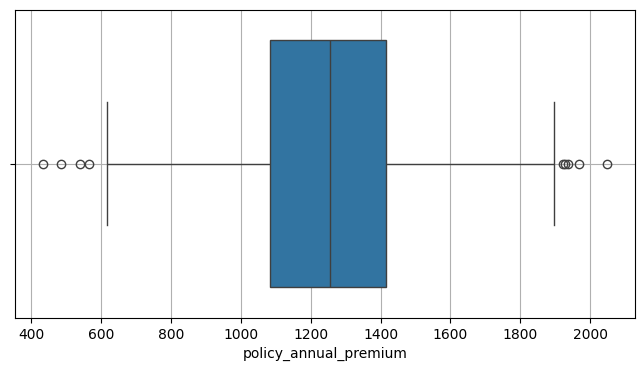

In [ ]:
# for policy_annual_premium
plt.figure(figsize=(8,4))
sns.boxplot(x=df['policy_annual_premium'])
plt.grid()
plt.show()

In [ ]:
# lower bound
idx_low = df[df['policy_annual_premium'] < 600].index

# upper bound
idx_high = df[df['policy_annual_premium'] > 1850].index

df.drop(idx_low, inplace=True)
df.drop(idx_high, inplace=True)

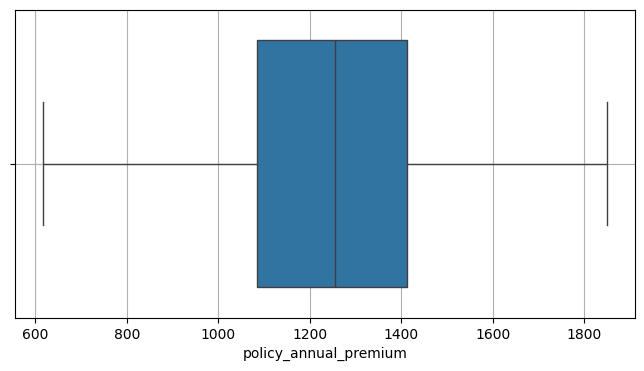

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['policy_annual_premium'])
plt.grid()
plt.show()

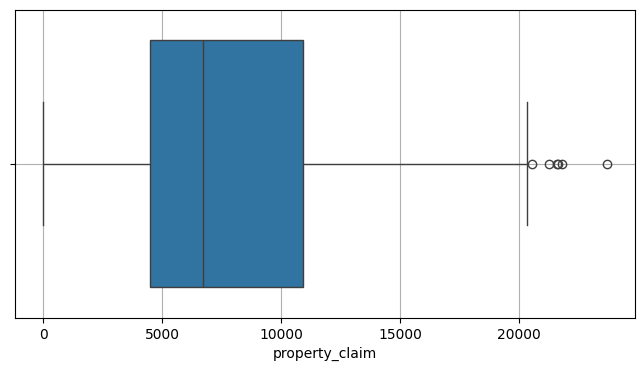

In [ ]:
# for property_claim
plt.figure(figsize=(8,4))
sns.boxplot(x=df['property_claim'])
plt.grid()
plt.show()

In [ ]:
idx = df[df['property_claim'] > 20000].index
df.drop(idx, inplace=True)

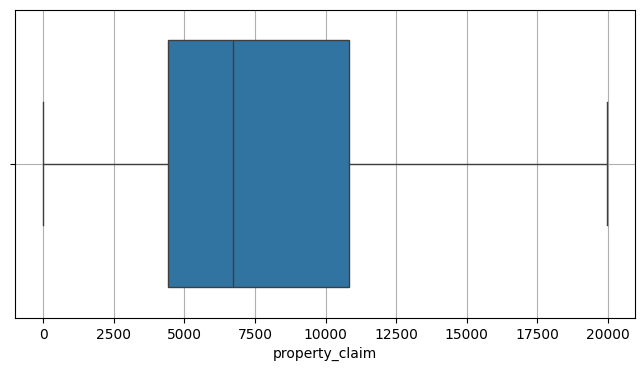

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['property_claim'])
plt.grid()
plt.show()

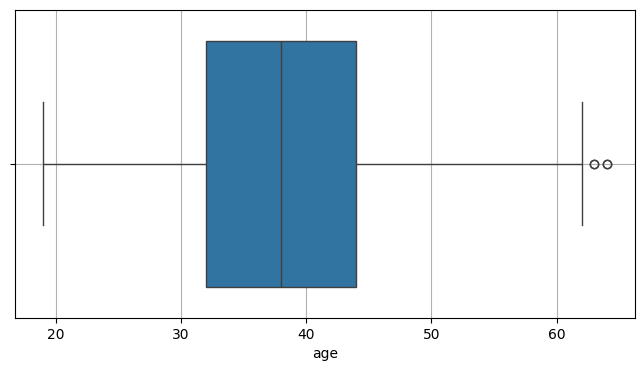

In [ ]:
# for age
plt.figure(figsize=(8,4))
sns.boxplot(x=df['age'])
plt.grid()
plt.show()

In [ ]:
idx = df[df['age'] > 60].index
df.drop(idx, inplace=True)

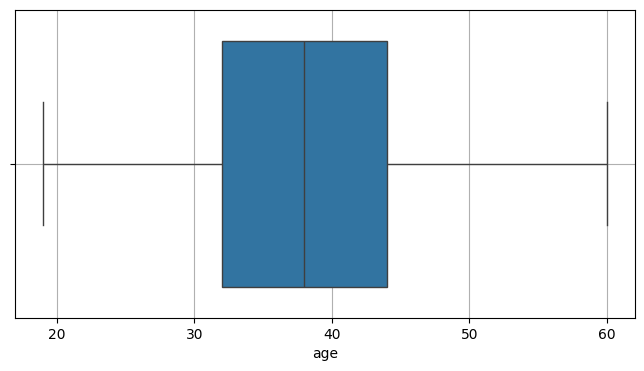

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['age'])
plt.grid()
plt.show()

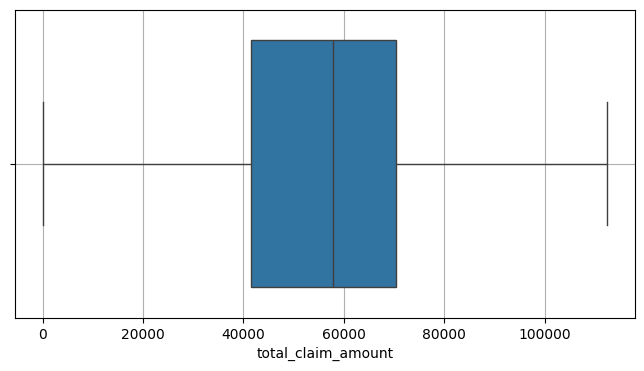

In [ ]:
#for total claim_amount
plt.figure(figsize=(8,4))
sns.boxplot(x=df['total_claim_amount'])
plt.grid()
plt.show()

# **Skewness Checking**



months_as_customer
0.3045262334132673


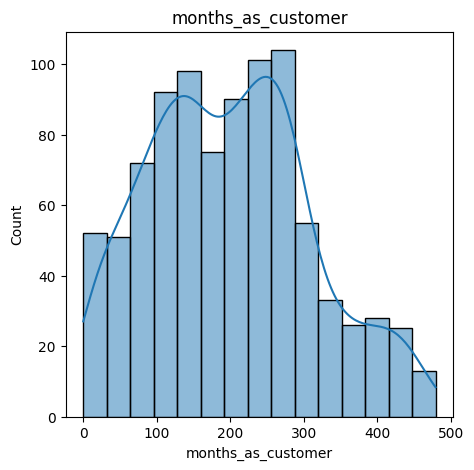

age
0.3606591140032169


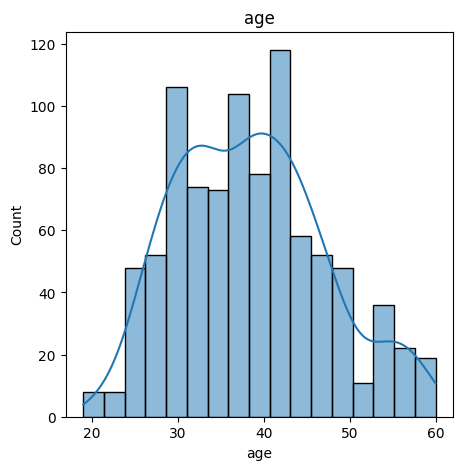

policy_deductable
0.4584893206242185


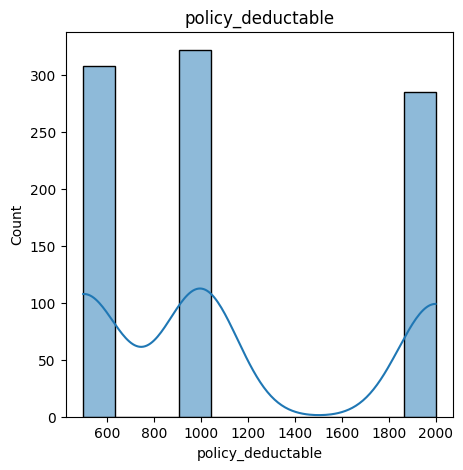

policy_annual_premium
-0.06442626043729754


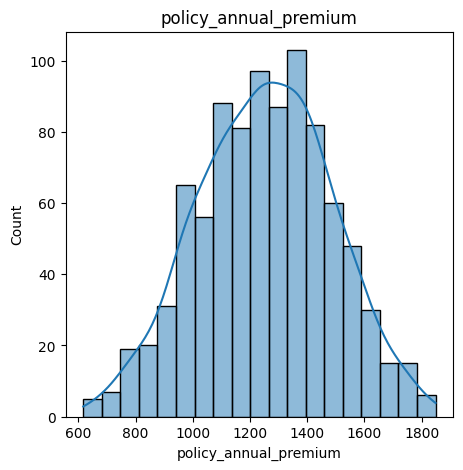

umbrella_limit
2.0035604877314572


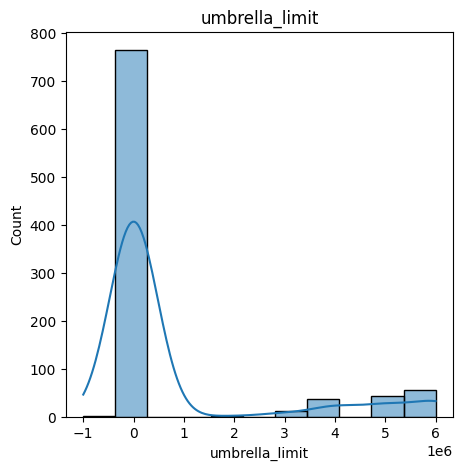

insured_sex
0.14243635507165436


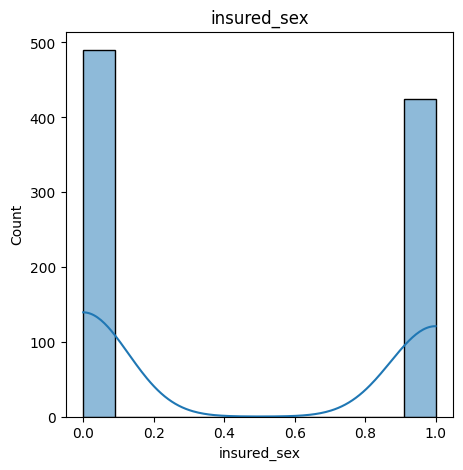

capital-gains
0.4570682167923027


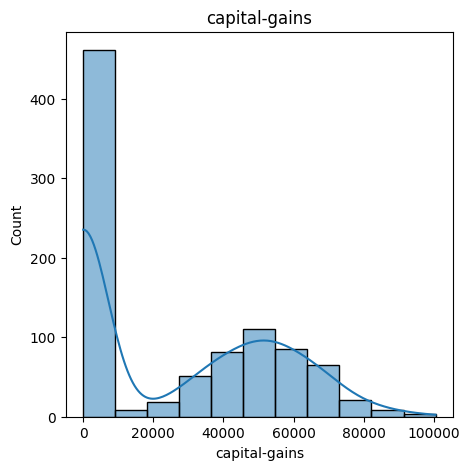

capital-loss
-0.40624382634748657


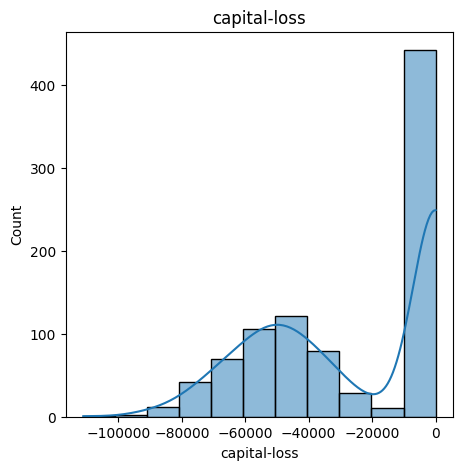

number_of_vehicles_involved
0.4923300647073434


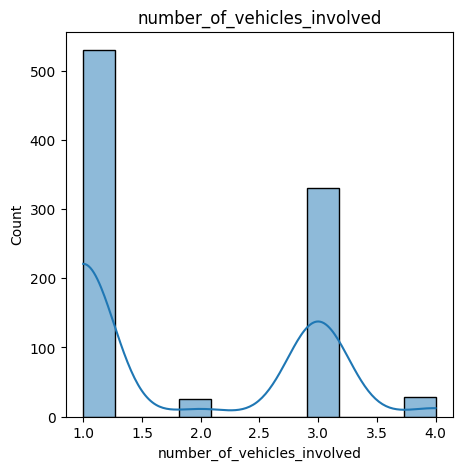

bodily_injuries
0.00601839600778187


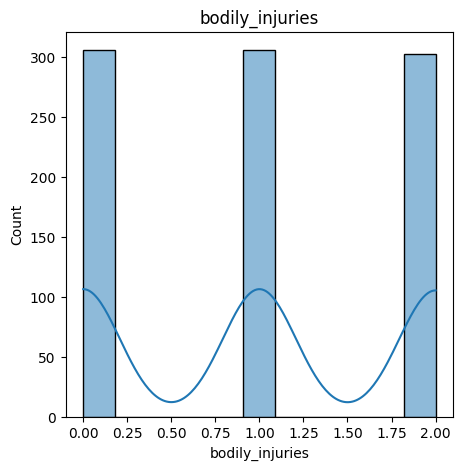

witnesses
0.027440265249127856


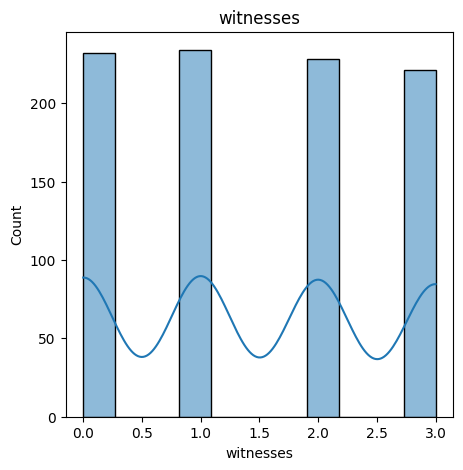

police_report_available
0.03583564724221302


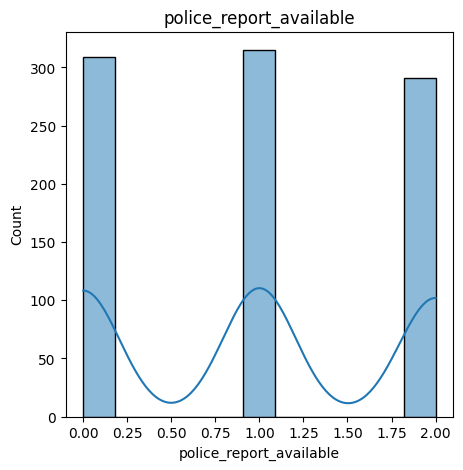

total_claim_amount
-0.6075737811635169


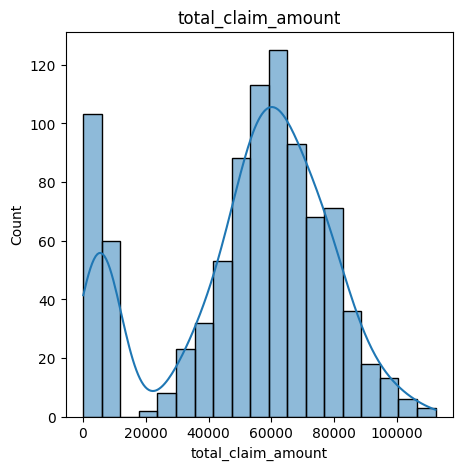

injury_claim
0.25533201405562556


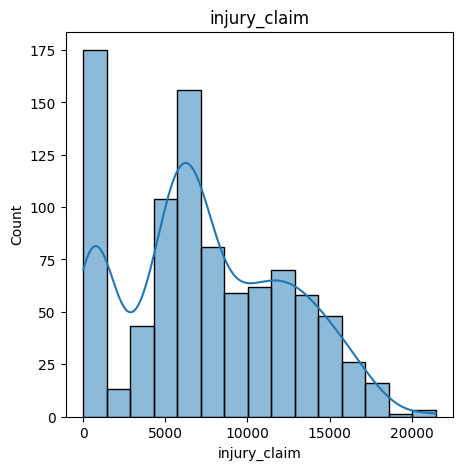

property_claim
0.2617463153057889


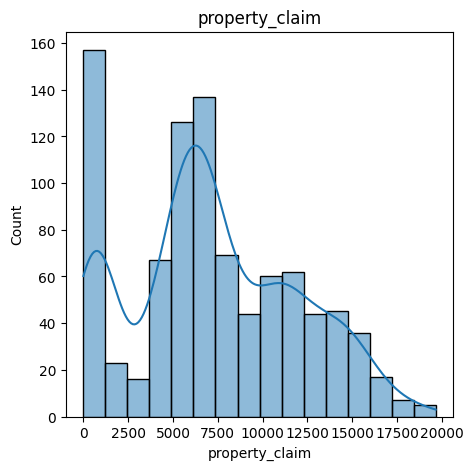

vehicle_claim
-0.6196342417382212


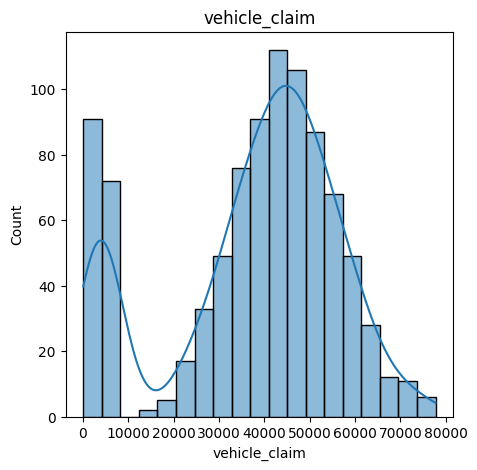

fraud_reported
1.221776315122623


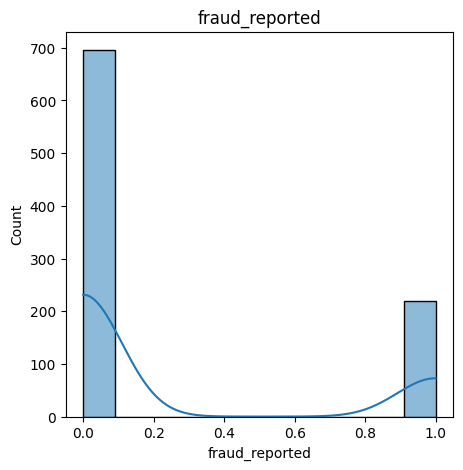

incident_type_Multi-vehicle Collision
0.3209960606658579


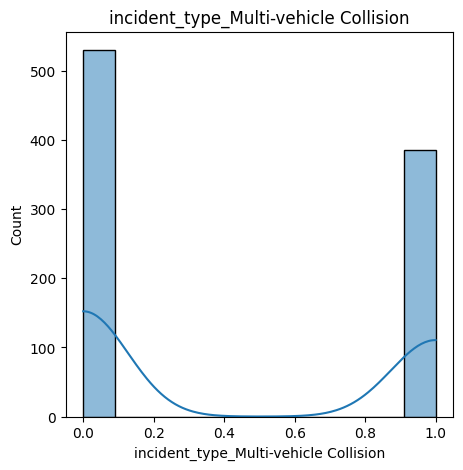

incident_type_Parked Car
3.021598536009708


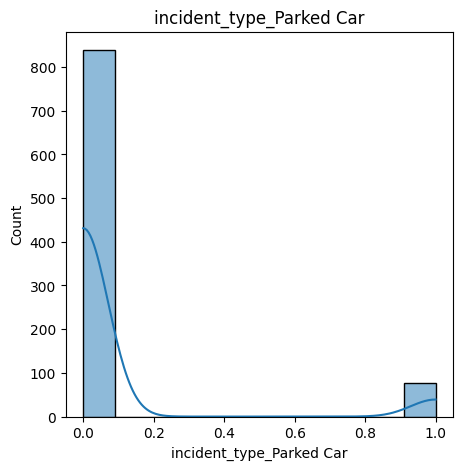

incident_type_Single Vehicle Collision
0.4036038157602858


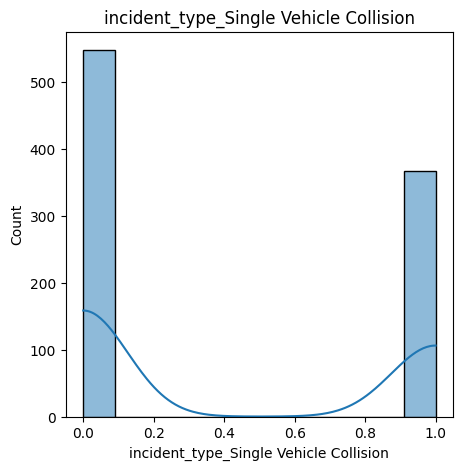

incident_type_Vehicle Theft
2.7608538250111074


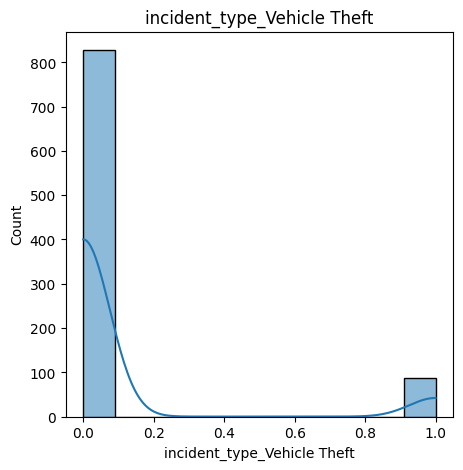

collision_type_
1.682335356480471


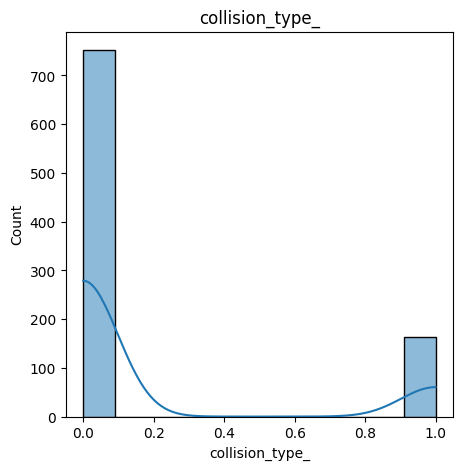

collision_type_Front Collision
1.1396307556768448


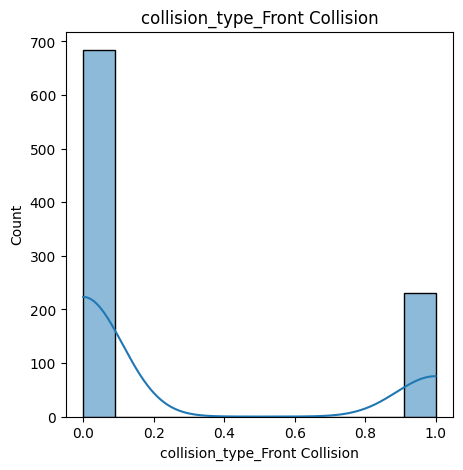

collision_type_Rear Collision
0.9335089955785866


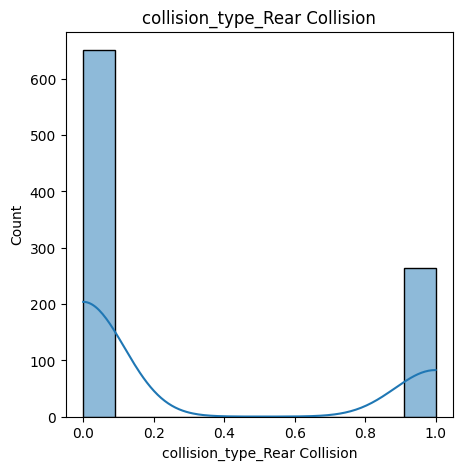

collision_type_Side Collision
0.975135268383559


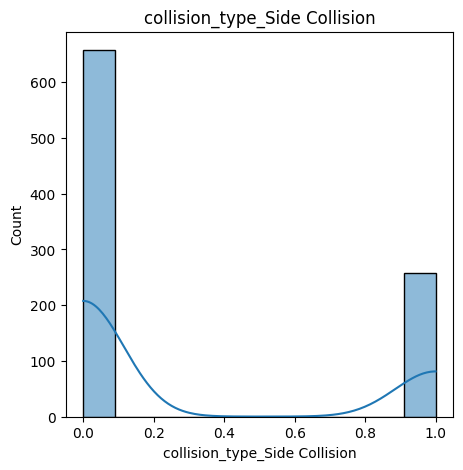

authorities_contacted_Ambulance
1.5085646180632277


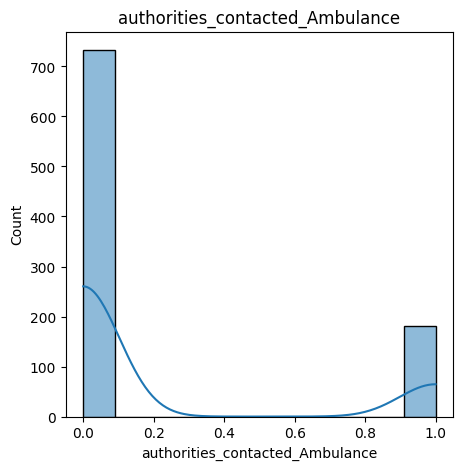

authorities_contacted_Fire
1.3774479114751248


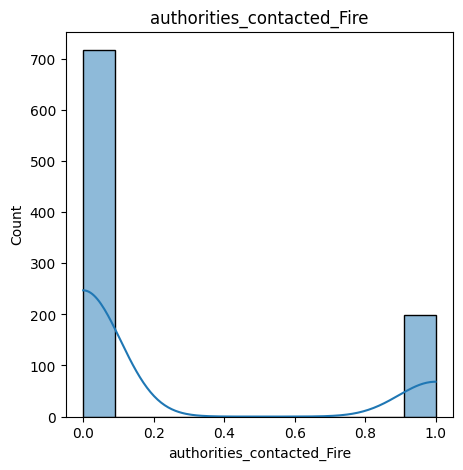

authorities_contacted_Other
1.5171824624065893


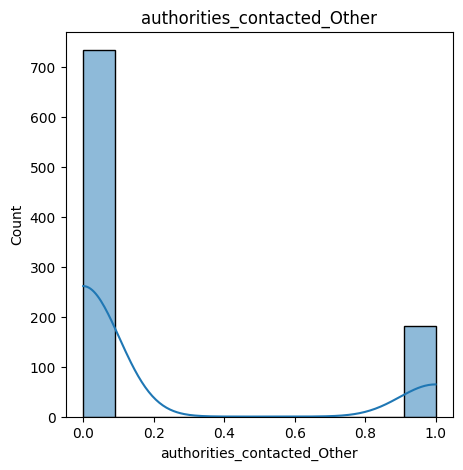

authorities_contacted_Police
0.46450167437008544


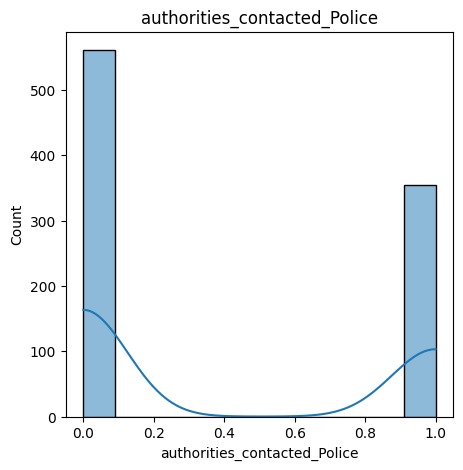

incident_severity_Major Damage
1.0178113035450427


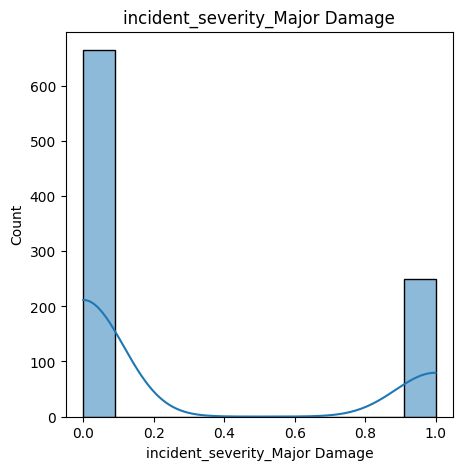

incident_severity_Minor Damage
0.6201746473155275


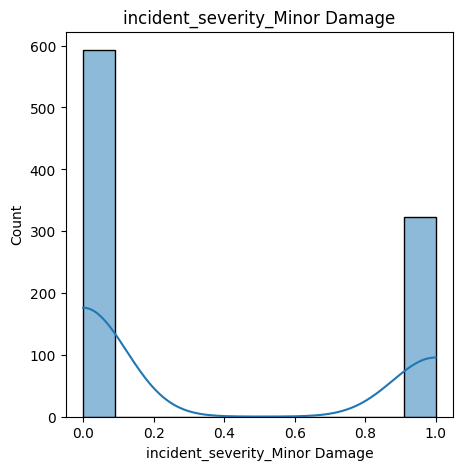

incident_severity_Total Loss
0.9512253651181302


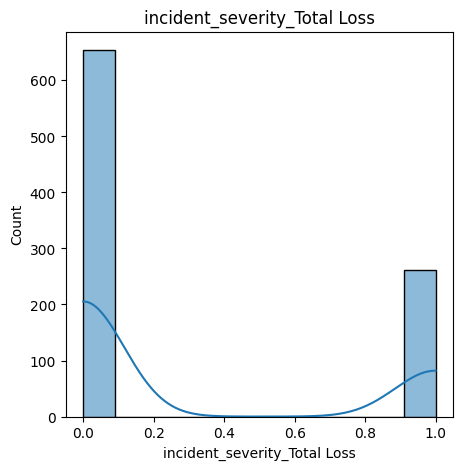

incident_severity_Trivial Damage
2.873495425629932


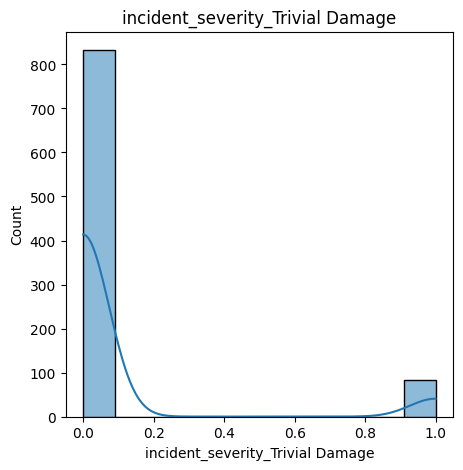

In [ ]:
from scipy.stats import skew

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    print(col)
    print(skew(df[col]))

    plt.figure(figsize=(5,5))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

# **Encoding**

In [ ]:
# encoding columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns_to_encode = ['fraud_reported','insured_sex','police_report_available']

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

In [ ]:
# encoding by one hot encoder
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

ohe_cols = ['incident_type','collision_type','authorities_contacted','incident_severity']
encoded=ohe.fit_transform(df[ohe_cols]).toarray()

encoded_df = pd.DataFrame(encoded,columns=ohe.get_feature_names_out(ohe_cols))

#prevents duplicate information in dataset
df = df.drop(columns=ohe_cols)

# reset_index(drop=True) ---> insure row alignment is correct
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)],axis=1)

In [ ]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,...,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage
0,328,48,1000,1406.91,0,1,53300,0,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,228,42,2000,1197.22,5000000,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,134,29,2000,1413.14,5000000,0,35100,0,3,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,256,41,2000,1415.74,6000000,0,48900,-62400,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,228,44,1000,1583.91,6000000,1,66000,-46000,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# **EDA**

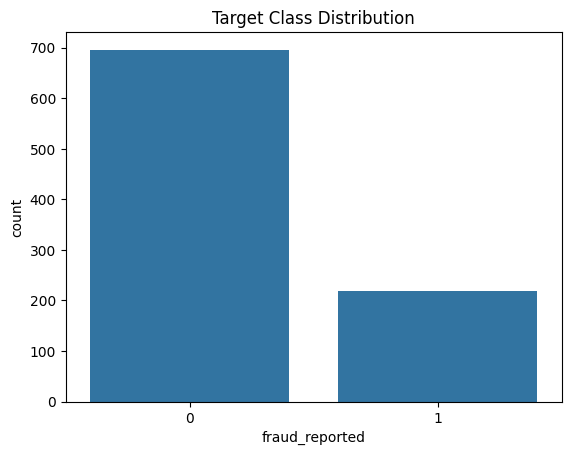

In [ ]:
sns.countplot(x='fraud_reported', data=df)
plt.title("Target Class Distribution")
plt.show()

# **Separate X & Y**

In [ ]:
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [ ]:
# Identify Categorical & Numeric Columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include='object').columns

In [ ]:
# ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), num_cols),('cat', OneHotEncoder(), cat_cols)])

# **Model Building**

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(class_weight='balanced')
logreg.fit(X_train,y_train)
ypred=logreg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.84      0.50      0.63       139
           1       0.31      0.70      0.43        44

    accuracy                           0.55       183
   macro avg       0.58      0.60      0.53       183
weighted avg       0.72      0.55      0.58       183



**HPT using solver**

In [ ]:
logreg=LogisticRegression(class_weight='balanced',solver='newton-cg')
logreg.fit(X_train,y_train)
ypred=logreg.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       139
           1       0.70      0.73      0.71        44

    accuracy                           0.86       183
   macro avg       0.80      0.81      0.81       183
weighted avg       0.86      0.86      0.86       183



In [ ]:
logreg=LogisticRegression(class_weight='balanced',solver='newton-cholesky')
logreg.fit(X_train,y_train)
ypred=logreg.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       139
           1       0.71      0.73      0.72        44

    accuracy                           0.86       183
   macro avg       0.81      0.82      0.81       183
weighted avg       0.86      0.86      0.86       183



### **SVM**

In [ ]:
from sklearn.svm import SVC
svm=SVC(class_weight='balanced')
svm.fit(X_train,y_train)
ypred=svm.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       139
           1       0.33      0.14      0.19        44

    accuracy                           0.73       183
   macro avg       0.55      0.53      0.51       183
weighted avg       0.66      0.73      0.68       183



**HPT using kernel**

In [ ]:
svm=SVC(class_weight='balanced',kernel='poly')
svm.fit(X_train,y_train)
ypred=svm.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       139
           1       0.28      0.11      0.16        44

    accuracy                           0.72       183
   macro avg       0.52      0.51      0.50       183
weighted avg       0.65      0.72      0.67       183



In [ ]:
svm=SVC(class_weight='balanced',kernel='sigmoid')
svm.fit(X_train,y_train)
ypred=svm.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       139
           1       0.30      0.23      0.26        44

    accuracy                           0.69       183
   macro avg       0.54      0.53      0.53       183
weighted avg       0.66      0.69      0.67       183



### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
ypred=dt.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82       139
           1       0.45      0.57      0.51        44

    accuracy                           0.73       183
   macro avg       0.65      0.68      0.66       183
weighted avg       0.76      0.73      0.74       183



In [ ]:
# check overfitting
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.73224043715847


**Pruning Techniques:**
*   max_depth
*   min_sample_Leaf
*   min_sample_split


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# max_depth

for i in range(1,31):
  dt1=DecisionTreeClassifier(max_depth=i)
  dt1.fit(X_train,y_train)
  ypred=dt1.predict(X_test)
  ac=accuracy_score(y_test,ypred)
  print(f"Max_depth{i} accuracy_score{ac}")

Max_depth1 accuracy_score0.8633879781420765
Max_depth2 accuracy_score0.8633879781420765
Max_depth3 accuracy_score0.8633879781420765
Max_depth4 accuracy_score0.7759562841530054
Max_depth5 accuracy_score0.7595628415300546
Max_depth6 accuracy_score0.8415300546448088
Max_depth7 accuracy_score0.7103825136612022
Max_depth8 accuracy_score0.7868852459016393
Max_depth9 accuracy_score0.7103825136612022
Max_depth10 accuracy_score0.6885245901639344
Max_depth11 accuracy_score0.6830601092896175
Max_depth12 accuracy_score0.726775956284153
Max_depth13 accuracy_score0.73224043715847
Max_depth14 accuracy_score0.7431693989071039
Max_depth15 accuracy_score0.6939890710382514
Max_depth16 accuracy_score0.6885245901639344
Max_depth17 accuracy_score0.6939890710382514
Max_depth18 accuracy_score0.7049180327868853
Max_depth19 accuracy_score0.7049180327868853
Max_depth20 accuracy_score0.7486338797814208
Max_depth21 accuracy_score0.726775956284153
Max_depth22 accuracy_score0.6994535519125683
Max_depth23 accuracy_sc

In [ ]:
dt2=DecisionTreeClassifier(max_depth=6)
dt2.fit(X_train, y_train)
ypred = dt2.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       139
           1       0.71      0.57      0.63        44

    accuracy                           0.84       183
   macro avg       0.79      0.75      0.77       183
weighted avg       0.83      0.84      0.83       183



In [ ]:
# check overfitting
print(dt2.score(X_train,y_train))
print(dt2.score(X_test,y_test))

0.8401639344262295
0.8415300546448088


In [ ]:
# min_samples_leaf

for i in range(1,31):
  dt3=DecisionTreeClassifier(min_samples_leaf=i)
  dt3.fit(X_train,y_train)
  ypred=dt3.predict(X_test)
  ac=accuracy_score(y_test,ypred)
  print(f"Min_samples_leaf{i} accuracy_score{ac}")

Min_samples_leaf1 accuracy_score0.73224043715847
Min_samples_leaf2 accuracy_score0.7595628415300546
Min_samples_leaf3 accuracy_score0.73224043715847
Min_samples_leaf4 accuracy_score0.73224043715847
Min_samples_leaf5 accuracy_score0.7759562841530054
Min_samples_leaf6 accuracy_score0.7923497267759563
Min_samples_leaf7 accuracy_score0.7704918032786885
Min_samples_leaf8 accuracy_score0.7431693989071039
Min_samples_leaf9 accuracy_score0.7595628415300546
Min_samples_leaf10 accuracy_score0.73224043715847
Min_samples_leaf11 accuracy_score0.7540983606557377
Min_samples_leaf12 accuracy_score0.7650273224043715
Min_samples_leaf13 accuracy_score0.7868852459016393
Min_samples_leaf14 accuracy_score0.7978142076502732
Min_samples_leaf15 accuracy_score0.7978142076502732
Min_samples_leaf16 accuracy_score0.7759562841530054
Min_samples_leaf17 accuracy_score0.7759562841530054
Min_samples_leaf18 accuracy_score0.7759562841530054
Min_samples_leaf19 accuracy_score0.7650273224043715
Min_samples_leaf20 accuracy_s

In [ ]:
dt4=DecisionTreeClassifier(min_samples_leaf=23)
dt4.fit(X_train, y_train)
ypred = dt4.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       139
           1       0.69      0.57      0.62        44

    accuracy                           0.84       183
   macro avg       0.78      0.74      0.76       183
weighted avg       0.83      0.84      0.83       183



In [ ]:
# check overfitting
print(dt4.score(X_train,y_train))
print(dt4.score(X_test,y_test))

0.8306010928961749
0.8360655737704918


### **Random Forest & Gradient Boosting**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
ypred=rf.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       139
           1       0.75      0.55      0.63        44

    accuracy                           0.85       183
   macro avg       0.81      0.74      0.77       183
weighted avg       0.84      0.85      0.84       183



In [ ]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
ypred=gb.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       139
           1       0.61      0.43      0.51        44

    accuracy                           0.80       183
   macro avg       0.72      0.67      0.69       183
weighted avg       0.78      0.80      0.78       183



### **XGBoost**

In [ ]:
from xgboost import XGBClassifier
xbg=XGBClassifier()
xbg.fit(X_train,y_train)
ypred=xbg.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       139
           1       0.68      0.48      0.56        44

    accuracy                           0.82       183
   macro avg       0.76      0.70      0.72       183
weighted avg       0.81      0.82      0.81       183



### **Comparing all agorithms accuracy**

In [ ]:
models = {'Logistic Regression': logreg,
          'SVM': svm,
          'Decision Tree': dt4,
          'Random Forest': rf,
          'Gradient Boosting': gb,
          'XGBoost': xbg}

In [ ]:
accuracy_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    accuracy_results.append({'Model': name,'Accuracy': acc})

In [ ]:
accuracy_df = pd.DataFrame(accuracy_results)
accuracy_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,0.863388
2,Decision Tree,0.836066
5,XGBoost,0.819672
3,Random Forest,0.803279
4,Gradient Boosting,0.797814
1,SVM,0.688525


In [ ]:
from sklearn.metrics import recall_score, f1_score

metrics_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall (Fraud)': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred)
    })

metrics_df = pd.DataFrame(metrics_results)
metrics_df.sort_values(by='Recall (Fraud)', ascending=False)

,Model,Accuracy,Recall (Fraud),F1-score
0,Logistic Regression,0.863388,0.727273,0.719101
2,Decision Tree,0.836066,0.568182,0.625000
3,Random Forest,0.846995,0.500000,0.611111
5,XGBoost,0.819672,0.477273,0.560000
4,Gradient Boosting,0.797814,0.431818,0.506667
1,SVM,0.688525,0.227273,0.259740
